# 딥러닝 모델 예측(추론) 성능 평가 지표 (2020.7.10.)

## 1.  전이 학습 모델로 구름 클래스 (6종) 분류하기

In [1]:
# 구름 클래스 (6종)
class_names = ['A - Clear Sky','B - Patterned Cloud','C - Thin White Clouds',
                   'D - Thick White Clouds','E - Thick Dark Clouds','F - Veil Clouds']

In [2]:
## 사용할 패키지 불러오기

import cv2    # 이미지 입출력
import glob   # 경로 찾기
import random  # 랜덤 처리
from PIL import Image   # 이미지 변환

# 저장된 모델 불러오기
from tensorflow.python.keras.models import load_model

# 예측(추론) 대상 이미지 불러오기 & 전처리하기
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.applications.vgg16 import preprocess_input

# 모델 예측(추론) 결과(클래스) 출력하기
import numpy as np
from numpy import argmax

# 성능 평가 지표 시각화
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 저장된 전이 학습 모델 불러오기
model = load_model('cloud6_model.h5')

# 전이 학습 모델 요약보기
#model.summary()

In [4]:
# 클래스 분류 대상 이미지 불러오기  (150*150 픽셀, PNG)
file = "./my_own_images/test_cloud_images/*"
filelist = glob.glob(file)

# 이미지 총 개수
image_count = len(filelist)
print('Number of Images: ', image_count)

# 파일 목록 확인
print()
print('Before Random Shuffle: ')
print(filelist[:2])

Number of Images:  60

Before Random Shuffle: 
['./my_own_images/test_cloud_images\\A_img341.png', './my_own_images/test_cloud_images\\A_img342.png']


In [5]:
# 랜덤하게 이미지(파일) 섞기
#random.shuffle(filelist)

# 파일 목록 확인
#print()
#print('After Random Shuffle: ')
#print(filelist[:2])

In [6]:
# 이미지 출력할 때 사용할 레이블 입력 

xlabels = ["xlabel"
          , "(0)", "(1)", "(2)", "(3)", "(4)", "(5)", "(6)", "(7)", "(8)", "(9)" 
          , "(10)", "(11)", "(12)", "(13)", "(14)", "(15)", "(16)", "(17)", "(18)", "(19)" 
          , "(20)", "(21)", "(22)", "(23)", "(24)", "(25)", "(26)", "(27)", "(28)", "(29)" 
          , "(30)", "(31)", "(32)", "(33)", "(34)", "(35)", "(36)", "(37)", "(38)", "(39)" 
          , "(40)", "(41)", "(42)", "(43)", "(44)", "(45)", "(46)", "(47)", "(48)", "(49)" 
          , "(50)", "(51)", "(52)", "(53)", "(54)", "(55)", "(56)", "(57)", "(58)", "(59)"]           

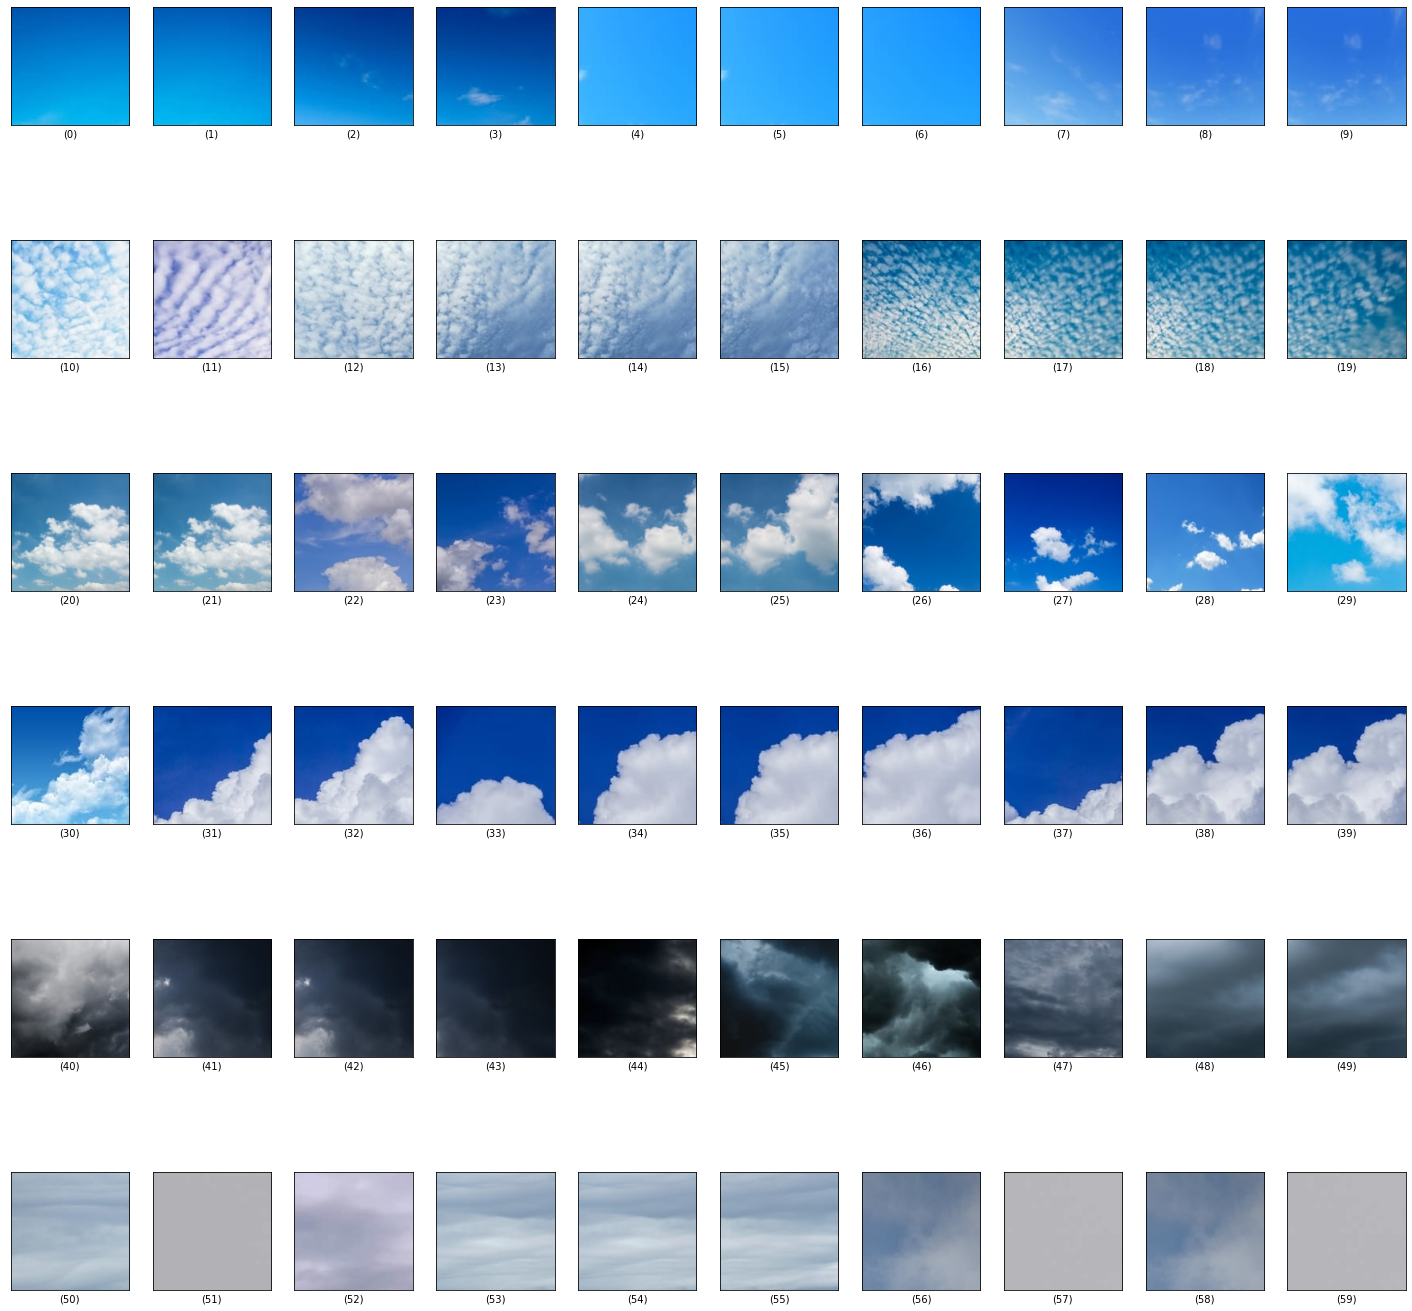

In [7]:
# 모델 입력 데이터 (이미지) 출력하기

fig = plt.figure(figsize=(25,25)) 

# rows*cols 행렬의 i번째 subplot 생성
rows = 6
cols = 10

i = 1

for filename in filelist:
    img = cv2.imread(filename)
    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # BGR 로 읽어들인 것을 RGB로 변경
    ax.set_xlabel(xlabels[i])
    ax.set_xticks([]), ax.set_yticks([])
    i += 1
 
plt.show()

In [8]:
# 모델 입력 데이터 (이미지) 클래스 예측(추론)하기

n = len(filelist)

tot = []

for i in range (n):   
    
    # 2차원 이미지 데이터를 사이즈 변환해서 불러오기 (VGG16 입력 사이즈(224*224 픽셀))
    img_test = load_img(filelist[i], target_size=(224, 224))
    img_test
   
    # 2차원 이미지 데이터를 1차원 배열로 변환하기
    arr_test = img_to_array(img_test)
    #print('    Shape of arr_test: ', arr_test)
    
    # 입력 데이터 전처리 (중심화 및 컬러 채널 순서 RGB --> BGR로 변경)
    arr_test = preprocess_input(arr_test)

    # 입력 데이터 결합 (VGG16 입력 차원으로 만들기)
    #arr_input = np.stack([arr_test], axis=0)    
    arr_input = np.stack([arr_test])    
    # 입력 데이터 모양 확인 
    #print('  Shape of arr_input: ', arr_input.shape)

    # 입력 데이터 클래스 예측 결과 산출 (확률)
    y_prob = model.predict(arr_input)
    # 예측 결과 모양 확인
    #print('           Shape of y_pred:', y_prob.shape)

    # 예측 결과 출력 (클래스)
    #print('(', i, ')', ' Prediction : ', np.argmax(y_prob), '  / 
                                 Class : ', class_names[np.argmax(y_prob)])   
    
    # 예측 결과 한 개 변수로 결합 (성능 평가에 활용)
    tot=np.append(tot, np.argmax(y_prob))
    
#print()
#print('=============================')
#print(tot)
tot

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3.,
       3., 3., 3., 2., 2., 2., 1., 2., 2., 0., 4., 4., 4., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 2., 4., 2., 4.])

## 2.  모델 예측 성능 평가를 위한 분류 결과 그려보기

##### 분류 결과표(confusion matrix)이란 각 테스트 데이터에 대한 모델의 예측 결과를 참 양성(True Positive), 참 음성(True Negative),
##### 거짓 양성(False Positive), 거짓 음성(False Negative)의 4가지 관점에서 분류하고, 각각에 해당하는 예측 결과의 개수를 정리한 표

### 2.1 분류 결과표 구현하기

In [9]:
# 사이킷런 라이브러리 불러오기
from sklearn.metrics import confusion_matrix

# 데이터: 0은 음성, 1은 양성을 뜻함
y_true = [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,
          2,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5]

#tot.dtype   # dtype('float64')
y_pred = np.int64(tot)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 2, 2, 0,
       4, 4, 4, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 4, 2, 4], dtype=int64)

In [10]:
# 실제 값과 예측 값을 혼동 행렬에 저장하기
confmax= confusion_matrix(y_true, y_pred)

# 혼동 행렬을 숫자로 출력하기
print(confmax)

[[10  0  0  0  0  0]
 [ 1  9  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  6  4  0  0]
 [ 3  2  2  0  3  0]
 [ 5  1  2  0  2  0]]


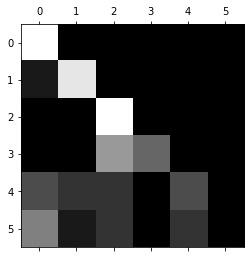

In [11]:
# 혼동 행렬을 이미지로 출력하기 (행: 실제 클래스, 열: 예측 클래스)
# 가장 큰 값: 흰색, 가장 작은 값: 검은색, 값이 클수록 좋음
plt.matshow(confmax, cmap=plt.cm.gray)
plt.show()

##### 에러 계산 (행렬의 각 값을 대응되는 클래스의 이미지 개수로 나누어 에러 비율을 비교)
##### 개수로 비교하면 이미지가 많은 클래스가 상대적으로 나쁘게 보이기 때문에 비율로 비교해야 함

[[10]
 [10]
 [10]
 [10]
 [10]
 [10]]
[[1.  0.  0.  0.  0.  0. ]
 [0.1 0.9 0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.6 0.4 0.  0. ]
 [0.3 0.2 0.2 0.  0.3 0. ]
 [0.5 0.1 0.2 0.  0.2 0. ]]


<function matplotlib.pyplot.show(*args, **kw)>

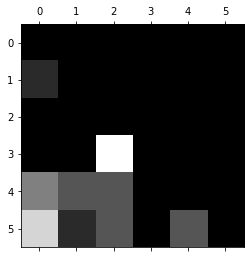

In [12]:
# 클래스별 이미지 개수
row_sums = confmax.sum(axis=1, keepdims=True)
print(row_sums)

# 에러 비율 계산
norm_confmax = confmax / row_sums
print(norm_confmax)

# 주대각선만 0으로 채워서 그리기
np.fill_diagonal(norm_confmax, 0)
plt.matshow(norm_confmax, cmap=plt.cm.gray)
plt.show

#####  [결과 해석]
##### 클래스 E, F 를 클래스 A로 잘못 분류, 클래스 D를 클래스 C로 잘못 분류하고 있음
##### 구름 클래스 (6종)
##### A - Clear Sky, B - Patterned Cloud, C - Thin White Clouds, D - Thick White Clouds, E - Thick Dark Clouds, F - Veil Clouds

##

### 2.2 정밀도, 재현율, F1-score 계산하기

##### 정밀도(precision): 양성으로 예측된 데이터 중 실제로 양성인 것의 비율 (1에 가까울수록 좋음)
##### 재현율(recall): 실제 양성 데이터 중 양성으로 예측된 것의 비율 (1에 가까울수록 좋음)
##### F1-score: 정밀도와 재현율을 가중조화평균 (가중치가 1이면 F1-score라고 함) (1에 가까울수록 좋음)

##### 
##### 다중 클래스 문제의 경우에는 각각의 클래스에 대해 자신을 양성 (1) 클래스로,
##### 다른 클래스를 음성(0) 클래스로 가정하여 OvR 문제를 풀고 각각에 대해 정밀도, 재현율, 거짓양성률 등의 평가점수를 구한다.¶
##### 이렇게 하면 클래스별로 각각 다른 평가점수가 나오므로 이를 하나로 합쳐는 일종의 평균을 구해야 하는데 다음과 같은 여러가지 기준을 사용한다.
##### macro: 단순평균
##### weighted: 각 클래스에 속하는 표본의 갯수로 가중평균
##### accuracy: 정확도. 전체 학습데이터의 개수에서 각 클래스에서 자신의 클래스를 정확하게 맞춘 개수의 비율

In [13]:
from sklearn.metrics import classification_report

#y_true = [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,
           3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5]
#y_pred = np.int64(tot)

#class_names = ['A - Clear Sky','B - Patterned Cloud','C - Thin White Clouds',
#            'D - Thick White Clouds','E - Thick Dark Clouds','F - Veil Clouds']

print(classification_report(y_true, y_pred, target_names=class_names))

                        precision    recall  f1-score   support

         A - Clear Sky       0.53      1.00      0.69        10
   B - Patterned Cloud       0.75      0.90      0.82        10
 C - Thin White Clouds       0.50      1.00      0.67        10
D - Thick White Clouds       1.00      0.40      0.57        10
 E - Thick Dark Clouds       0.60      0.30      0.40        10
       F - Veil Clouds       0.00      0.00      0.00        10

              accuracy                           0.60        60
             macro avg       0.56      0.60      0.52        60
          weighted avg       0.56      0.60      0.52        60



C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 3. PRG 그려보기

#### PRG (Precision-Recall Graph) : 정밀도와 재현율이 어떤 관계를 가지고 변하는지 그래프로 표시한 것
#### AP (Average Precision): 각 재현율에 해당하는 정밀도를 합한 다음 평균을 취한 값 (하나의 값으로 계산되기 때문에 성능 비교가 간단함)
#####
##### PRG그리는 방법: x 축을 재현율로, y 축을 정밀도로 두어 이차원 평면 상에 결과를 표시
##### 정밀도: 모델이 얼마나 정밀한가? 실제 양성 수/전체 음성 수 (진짜 양성만 잘 고를수록 정밀도가 높음)
##### 재현율: 양성인 것을 놓치지 않고 골라내는가?  검출 양성 수/전체 양성 수 (양성을 많이 고를수록 재현율이 높음)
##### 출처: 블록과 함께 하는 파이썬 딥러닝 케라스 (김태영 저, 디지털북스, 2019)

### 3.1 넘파이와 맷플롯립으로 PR 곡선 그리기

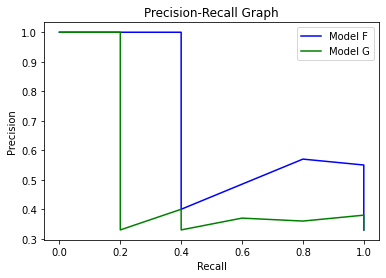

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

precision_F = np.array([0.33, 0.38, 0.45, 0.55, 0.57, 0.40, 0.66, 1.0, 1.0, 1.0, 1.0])
recall_F = np.array([1.0, 1.0, 1.0, 1.0, 0.8, 0.4, 0.4, 0.4, 0.4, 0.2, 0.0])

precision_G = np.array([0.33, 0.38, 0.36, 0.37, 0.33, 0.40, 0.33, 0.5, 1.0, 1.0, 1.0])
recall_G = np.array([1.0, 1.0, 0.8, 0.6, 0.4, 0.4, 0.2, 0.2, 0.2, 0.2, 0.0])

plt.title('Precision-Recall Graph')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.plot(recall_F, precision_F, 'b', label = 'Model F')
plt.plot(recall_G, precision_G, 'g', label = 'Model G')

plt.legend(loc='upper right')
plt.show()

### 3.2 넘파이, 맷플롯립, 사이킷런으로 PR 곡선 그리기

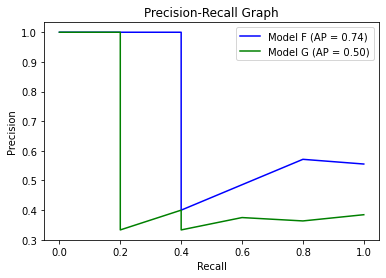

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import precision_recall_curve, average_precision_score

class_F = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1])
proba_F = np.array([0.05, 0.05, 0.15, 0.15, 0.25, 0.25, 0.35, 0.35, 0.45, 0.45, 
                    0.55, 0.55, 0.65, 0.85, 0.95])

class_G = np.array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1])
proba_G = np.array([0.05, 0.05, 0.15, 0.15, 0.25, 0.25, 0.25, 0.35, 0.35, 0.45, 
                    0.55, 0.55, 0.65, 0.75, 0.95])

precision_F, recall_F, _ = precision_recall_curve(class_F, proba_F)
precision_G, recall_G, _ = precision_recall_curve(class_G, proba_G)

ap_F = average_precision_score(class_F, proba_F)
ap_G = average_precision_score(class_G, proba_G)

plt.title('Precision-Recall Graph')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.plot(recall_F, precision_F, 'b', label = 'Model F (AP = %0.2f)'%ap_F)
plt.plot(recall_G, precision_G, 'g', label = 'Model G (AP = %0.2f)'%ap_G)

plt.legend(loc='upper right')
plt.show()

## 4. ROC 그려보기

#### ROC (Receiver Operating Characterlistic Curve): 민감도와 특이도가 어떤 관계를 가지고 변하는지 그래프로 표시한 것
#### AUC (Area Under Curve):  ROC 아래 면적을 구한 값 (하나의 값으로 계산되기 때문에 성능 비교가 간단함)
#####
##### ROC 그리는 방법: 임계값별로 민감도와 특이도를 계산하여 x 축을 (1-특이도),  y 축을 민감도로 두고 이차원 평면상에 점을 찍고 연결
##### 민감도: 양성에 얼마나 민감하냐?  판정한 것 중 실제 양성 수/전체 양성 수 (양성을 양성이라고 잘 판정)
##### 특이도: 얼마나 특이한 것만 양성으로 골라내느냐? 판정한 것 중 실제 음성 수/전체 음성 수 (음성을 음성이라고 잘 판정)
##### 출처: 블록과 함께 하는 파이썬 딥러닝 케라스 (김태영 저, 디지털북스, 2019)

### 4.1 넘파이와 맷플롯립으로 ROC 그리기

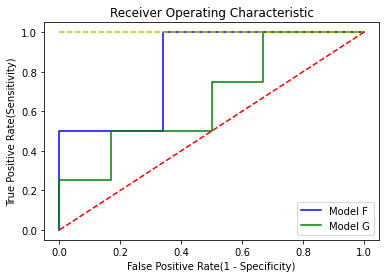

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sens_F = np.array([1.0, 1.0, 1.0, 1.0, 0.75, 0.5, 0.5, 0.5, 0.5, 0.5, 0.0])
spec_F = np.array([0.0, 0.16, 0.5, 0.66, 0.66, 0.66, 0.83, 1.0, 1.0, 1.0, 1.0])

sens_G = np.array([1.0, 1.0, 0.75, 0.75, 0.5, 0.5, 0.5, 0.5, 0.25, 0.25, 0.0])
spec_G = np.array([0.0, 0.33, 0.33, 0.5, 0.5, 0.66, 0.66, 0.83, 0.83, 1.0, 1.0])

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(1-spec_F, sens_F, 'b', label = 'Model F')
plt.plot(1-spec_G, sens_G, 'g', label = 'Model G')

plt.plot([0,1],[1,1], 'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

### 4.2 넘파이, 맷플롯립, 사이킷런으로 ROC 그리기

#### 클래스 값과 모델에서 나오는 클래스 확률값을 입력하면 ROC를 그릴 수 있는 값과 AUC 값을 알려 줌

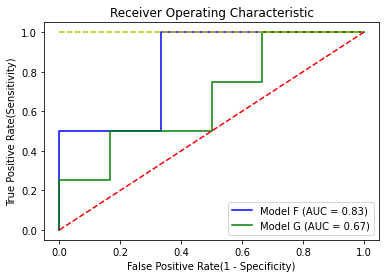

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_curve, auc

class_F = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])
proba_F = np.array([0.05, 0.15, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.95, 0.95])

class_G = np.array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1])
proba_G = np.array([0.05, 0.05, 0.15, 0.25, 0.35, 0.45, 0.65, 0.75, 0.85, 0.95])

false_positive_rate_F, true_positive_rate_F, thresholds_F = roc_curve(class_F, proba_F)
false_positive_rate_G, true_positive_rate_G, thresholds_G = roc_curve(class_G, proba_G)
roc_auc_F = auc(false_positive_rate_F, true_positive_rate_F)
roc_auc_G = auc(false_positive_rate_G, true_positive_rate_G)

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate_F, true_positive_rate_F, 'b', label='Model F (AUC = %0.2f)'% roc_auc_F)
plt.plot(false_positive_rate_G, true_positive_rate_G, 'g', label='Model G (AUC = %0.2f)'% roc_auc_G)

plt.plot([0,1],[1,1], 'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

##### [결과 해석]
##### 노란점선은 이상적인 모델 (임계값과 상관없이 민감도와 특이도가 100%일 때를 말함. AUC =1)
##### 빨간점선은 기준선으로 AUC=0.5. 개발한 모델을 사용하려면 이 기준선보다는 상위에 있어야 함

# END

In [18]:
from sklearn.metrics import confusion_matrix

y_true = [ 3, 2, 0, 2, 2, 0, 1, 3, 3]
y_pred = [ 3, 2, 1, 1, 2, 0, 1, 2, 3]

confusion_matrix(y_true, y_pred)

array([[1, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 2, 0],
       [0, 0, 1, 2]], dtype=int64)

In [19]:
from sklearn.metrics import confusion_matrix

y_true = [ 3, 2, 0, 2, 2, 0, 1, 3, 3, 4, 4, 5, 5]
y_pred = [ 3, 2, 1, 1, 2, 0, 1, 2, 3, 3, 4, 4, 5]

confusion_matrix(y_true, y_pred)

array([[1, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 2, 0, 0, 0],
       [0, 0, 1, 2, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 1]], dtype=int64)

In [20]:
from sklearn.metrics import confusion_matrix

y_true = [ 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1]
y_pred = [ 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0]

confusion_matrix(y_true, y_pred)

array([[4, 2],
       [2, 5]], dtype=int64)

In [21]:
from sklearn.metrics import confusion_matrix

y_true = [ 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1]
y_pred = [ 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0]

confusion_matrix(y_true, y_pred, labels=[1,0])

array([[5, 2],
       [2, 4]], dtype=int64)